In [267]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

This data was pulled from a MySQL Database that holds UFCStats.com Historical Data

In [268]:
df_fw = pd.read_csv('fw_historical.csv', error_bad_lines=False)
df_fw.dropna()

df_fw = df_fw.loc[df_fw.control_time != '--']


df_fw['seconds'] = df_fw['control_time'].str.split(':',expand=True)[1]
df_fw['minutes'] = df_fw['control_time'].str.split(':',expand=True)[0]

df_fw['seconds'] = df_fw['seconds'].astype(dtype=int)
df_fw['minutes'] = df_fw['minutes'].astype(dtype=int)

df_fw['control_time'] = (df_fw['minutes'] * 60) + df_fw['seconds']
df_fw = df_fw.drop(columns=['seconds','minutes'])


df_fw['seconds'] = df_fw.ending_time.str.split(':',expand=True)[1]
df_fw['minutes'] = df_fw.ending_time.str.split(':',expand=True)[0]

df_fw['seconds'] = df_fw['seconds'].astype(int)
df_fw['minutes'] = df_fw['minutes'].astype(int)

df_fw['ending_time'] = (df_fw['minutes'] * 60) + df_fw['seconds']
df_fw = df_fw.drop(columns=['seconds','minutes'])


df_fw.loc[df_fw.round_number != df_fw.ending_round,'ending_time'] = 300

df_fw['standing_time'] = df_fw.ending_time - df_fw.control_time

print(df_fw.columns)

Index(['fight_id', 'fight_title', 'winning_fighter_name',
       'losing_fighter_name', 'weight_class', 'method_of_victory',
       'specific_victory_details', 'ending_round', 'ending_time', 'fight_url',
       'unique_round_id', 'unique_fight_id', 'unique_event_id', 'round_number',
       'fighter_name', 'knockdowns', 'total_strikes_landed',
       'total_strikes_attempted', 'takedowns', 'takedowns_attempted',
       'submission_attempts', 'guard_passes', 'reversals', 'control_time',
       'unique_round_id.1', 'unique_fight_id.1', 'unique_event_id.1',
       'round_number.1', 'fighter_name.1', 'significant_strikes_head_landed',
       'significant_strikes_head_attempted', 'significant_strikes_body_landed',
       'significant_strikes_body_attempted', 'significant_strikes_leg_landed',
       'significant_strikes_leg_attempted',
       'significant_strikes_standing_landed',
       'significant_strikes_standing_attempted',
       'significant_strikes_clinch_landed',
       'significant_

In [269]:
df_fw.shape

(978, 42)

In [270]:
df_fw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   fight_id                                978 non-null    int64 
 1   fight_title                             978 non-null    object
 2   winning_fighter_name                    978 non-null    object
 3   losing_fighter_name                     978 non-null    object
 4   weight_class                            978 non-null    object
 5   method_of_victory                       978 non-null    object
 6   specific_victory_details                300 non-null    object
 7   ending_round                            978 non-null    int64 
 8   ending_time                             978 non-null    int32 
 9   fight_url                               978 non-null    object
 10  unique_round_id                         978 non-null    int64 
 11  unique

In [271]:
# creating the group frame

group_frame_fw = df_fw[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed','significant_strikes_head_attempted','significant_strikes_body_attempted','significant_strikes_leg_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted', 'knockdowns', 'standing_time' ]].groupby('fighter_name').sum().reset_index()
group_frame_fw.head(30)

,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time
0,Akira Corassani,32,11,24,4,5,0,1,0,229
1,Alex Caceres,580,250,509,87,44,20,40,2,4176
2,Alex White,180,81,137,47,18,8,14,1,917
3,Alexander Volkanovski,513,283,393,58,135,27,46,3,2730
4,Alexandre Franca Nogueira,23,4,21,0,4,0,2,0,481
5,Andre Fili,1055,385,984,84,88,67,34,3,5655
6,Andy Ogle,141,48,117,33,8,16,1,0,672
7,Anistavio Medeiros,18,8,12,0,6,0,0,0,132
8,Arnold Allen,549,230,506,64,37,38,20,2,3721
9,Artem Lobov,813,333,621,102,126,6,30,0,4719


In [272]:
group_frame_fw['head_ratio'] = group_frame_fw.significant_strikes_head_attempted / (group_frame_fw.significant_strikes_head_attempted + group_frame_fw.significant_strikes_body_attempted + group_frame_fw.significant_strikes_leg_attempted)
group_frame_fw['body_ratio'] = group_frame_fw.significant_strikes_body_attempted / (group_frame_fw.significant_strikes_head_attempted + group_frame_fw.significant_strikes_body_attempted + group_frame_fw.significant_strikes_leg_attempted)
group_frame_fw['leg_ratio'] = group_frame_fw.significant_strikes_leg_attempted / (group_frame_fw.significant_strikes_head_attempted + group_frame_fw.significant_strikes_body_attempted + group_frame_fw.significant_strikes_leg_attempted)


In [273]:
ratio_frame_fw = group_frame_fw[['fighter_name', 'head_ratio', 'body_ratio', 'leg_ratio' ]]
print('Mix Strikes')
ratio_frame_fw.head(148)

Mix Strikes


,fighter_name,head_ratio,body_ratio,leg_ratio
0,Akira Corassani,0.727273,0.121212,0.151515
1,Alex Caceres,0.795312,0.135937,0.068750
2,Alex White,0.678218,0.232673,0.089109
3,Alexander Volkanovski,0.670648,0.098976,0.230375
4,Alexandre Franca Nogueira,0.840000,0.000000,0.160000
...,...,...,...,...
143,Yair Rodriguez,0.747021,0.123740,0.129239
144,Yaotzin Meza,0.704918,0.131148,0.163934
145,Yui Chul Nam,0.700000,0.227778,0.072222
146,Zabit Magomedsharipov,0.753425,0.121005,0.125571


<AxesSubplot:xlabel='head_ratio', ylabel='Count'>

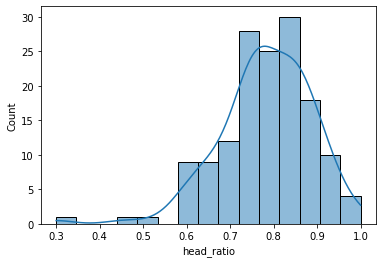

In [274]:
sns.histplot(data=ratio_frame_fw, x="head_ratio", kde=True)

<AxesSubplot:xlabel='body_ratio', ylabel='Count'>

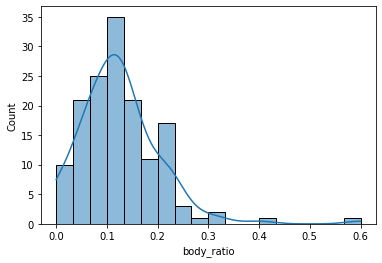

In [275]:
sns.histplot(data=ratio_frame_fw, x="body_ratio", kde=True)

<AxesSubplot:xlabel='leg_ratio', ylabel='Count'>

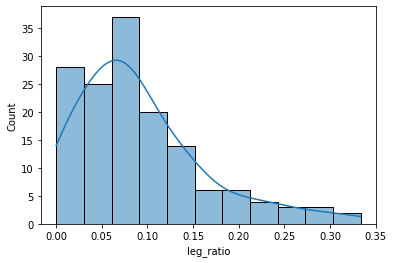

In [276]:
sns.histplot(data=ratio_frame_fw, x="leg_ratio", kde=True)

In [277]:
#STRIKE LOCATION
location_ratio_fw = group_frame_fw[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted']].groupby('fighter_name').sum().reset_index()

In [278]:
location_ratio_fw['standing_ratio'] = location_ratio_fw.significant_strikes_standing_attempted / (location_ratio_fw.significant_strikes_standing_attempted + location_ratio_fw.significant_strikes_ground_attempted + location_ratio_fw.significant_strikes_clinch_attempted)
location_ratio_fw['ground_ratio'] = location_ratio_fw.significant_strikes_ground_attempted / (location_ratio_fw.significant_strikes_standing_attempted + location_ratio_fw.significant_strikes_ground_attempted + location_ratio_fw.significant_strikes_clinch_attempted)
location_ratio_fw['clinch_ratio'] = location_ratio_fw.significant_strikes_clinch_attempted / (location_ratio_fw.significant_strikes_standing_attempted + location_ratio_fw.significant_strikes_ground_attempted + location_ratio_fw.significant_strikes_clinch_attempted)

print('Strike Location')
location_ratio_fw[['fighter_name', 'standing_ratio', 'ground_ratio', 'clinch_ratio']]

Strike Location


,fighter_name,standing_ratio,ground_ratio,clinch_ratio
0,Akira Corassani,0.969697,0.000000,0.030303
1,Alex Caceres,0.906250,0.031250,0.062500
2,Alex White,0.891089,0.039604,0.069307
3,Alexander Volkanovski,0.875427,0.046075,0.078498
4,Alexandre Franca Nogueira,0.920000,0.000000,0.080000
...,...,...,...,...
143,Yair Rodriguez,0.808433,0.143905,0.047663
144,Yaotzin Meza,0.918033,0.000000,0.081967
145,Yui Chul Nam,0.500000,0.183333,0.316667
146,Zabit Magomedsharipov,0.831050,0.127854,0.041096


<AxesSubplot:xlabel='standing_ratio', ylabel='Count'>

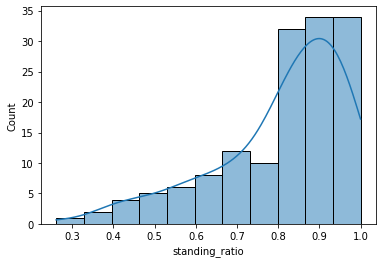

In [279]:
sns.histplot(data=location_ratio_fw, x="standing_ratio", kde=True)

<AxesSubplot:xlabel='ground_ratio', ylabel='Count'>

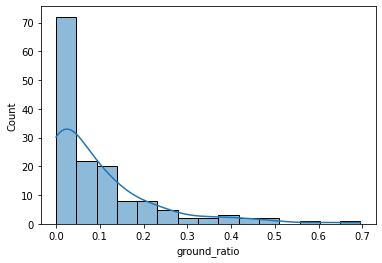

In [280]:
sns.histplot(data=location_ratio_fw, x="ground_ratio", kde=True)

<AxesSubplot:xlabel='clinch_ratio', ylabel='Count'>

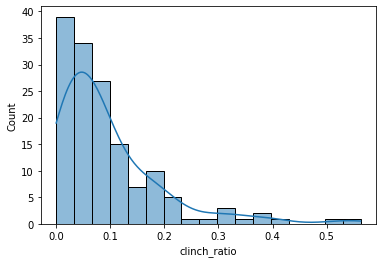

In [281]:
sns.histplot(data=location_ratio_fw, x="clinch_ratio", kde=True)

In [282]:
# Turn standing time to minutes
group_frame_fw['standing_time']=group_frame_fw.standing_time/60

In [283]:
#SApSM
sapsm_fw = group_frame_fw[['fighter_name', 'significant_strikes_standing_attempted','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [284]:
#SApSM_Ratio
sapsm_fw['SApSM'] = sapsm_fw.significant_strikes_standing_attempted / sapsm_fw.standing_time
print('Standing Attempts per Standing minute')
print(sapsm_fw)

Standing Attempts per Standing minute
                   fighter_name  significant_strikes_standing_attempted  \
0               Akira Corassani                                      32   
1                  Alex Caceres                                     580   
2                    Alex White                                     180   
3         Alexander Volkanovski                                     513   
4    Alexandre Franca Nogueira                                       23   
..                          ...                                     ...   
143              Yair Rodriguez                                     882   
144                Yaotzin Meza                                      56   
145                Yui Chul Nam                                      90   
146       Zabit Magomedsharipov                                     364   
147            Zubaira Tukhugov                                      22   

     standing_time  knockdowns      SApSM  
0         3.81666

In [285]:
filtered_sapsm = sapsm_fw.loc[sapsm_fw.SApSM < 80]
filtered_sapsm.max()

fighter_name                              Zubaira Tukhugov
significant_strikes_standing_attempted                1690
standing_time                                   146.633333
knockdowns                                               7
SApSM                                                 24.4
dtype: object

In [286]:
filtered_sapsm.SApSM.mean()

8.364267965950392

In [287]:
filtered_sapsm.SApSM.std()

4.30416203599027

In [288]:
mid_range = filtered_sapsm.SApSM.max() - filtered_sapsm.SApSM.min()
mid_range = mid_range / 2
mid_range

11.958389261744966

<AxesSubplot:xlabel='SApSM', ylabel='Count'>

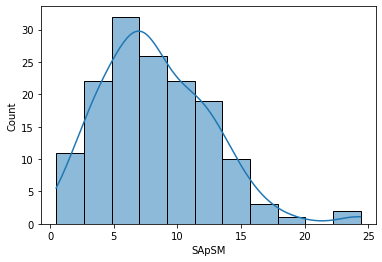

In [289]:
sns.histplot(data=filtered_sapsm, x="SApSM", kde=True)

<AxesSubplot:xlabel='SApSM'>

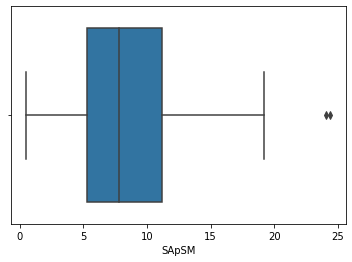

In [290]:
sns.boxplot(data=filtered_sapsm, x="SApSM")

In [291]:
print(f'Average strike Attempts per standing minute of FW: {sapsm_fw.SApSM.mean()}')

Average strike Attempts per standing minute of FW: 8.364267965950392


In [292]:
#SLpSM
slpsm_fw = group_frame_fw[['fighter_name', 'significant_strikes_standing_landed','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [293]:
#SLpSM Ratio
slpsm_fw['SLpSM'] = slpsm_fw.significant_strikes_standing_landed / slpsm_fw.standing_time
print('Standing Lands per standing minute')
print(slpsm_fw)

Standing Lands per standing minute
                   fighter_name  significant_strikes_standing_landed  \
0               Akira Corassani                                   11   
1                  Alex Caceres                                  250   
2                    Alex White                                   81   
3         Alexander Volkanovski                                  283   
4    Alexandre Franca Nogueira                                     4   
..                          ...                                  ...   
143              Yair Rodriguez                                  366   
144                Yaotzin Meza                                   21   
145                Yui Chul Nam                                   26   
146       Zabit Magomedsharipov                                  159   
147            Zubaira Tukhugov                                   15   

     standing_time  knockdowns     SLpSM  
0         3.816667           0  2.882096  
1        69.60

In [294]:
slpsm_fw_filtered = slpsm_fw.loc[slpsm_fw.SLpSM < slpsm_fw.SLpSM.max()]
slpsm_fw_filtered.head()

,fighter_name,significant_strikes_standing_landed,standing_time,knockdowns,SLpSM
0,Akira Corassani,11,3.816667,0,2.882096
1,Alex Caceres,250,69.600000,2,3.591954
2,Alex White,81,15.283333,1,5.299891
3,Alexander Volkanovski,283,45.500000,3,6.219780
4,Alexandre Franca Nogueira,4,8.016667,0,0.498960


In [295]:
slpsm_fw_filtered.SLpSM.mean()

3.0647291148981886

In [296]:
slpsm_fw_filtered.SLpSM.std()

1.8205138596752892

<AxesSubplot:xlabel='SLpSM', ylabel='Count'>

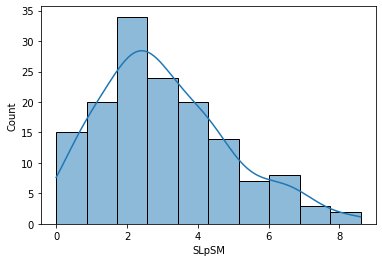

In [297]:
sns.histplot(data=slpsm_fw_filtered, x="SLpSM", kde=True)

<AxesSubplot:xlabel='SLpSM'>

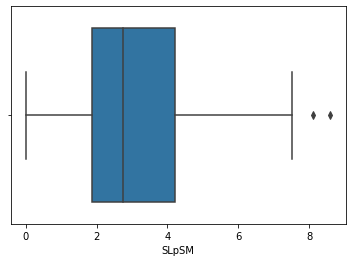

In [298]:
sns.boxplot(data=slpsm_fw_filtered, x="SLpSM")

In [365]:
#KNOCKDOWNS LANDED PER STANDING MINUTE 
kd_frame = df_fw[['standing_time', 'knockdowns', 'fighter_name']].groupby('fighter_name').sum().reset_index()
kd_frame['standing_time'] = kd_frame.standing_time / 60
#StandingMinutesPerKnockdown
kd_frame['SMpKD'] = kd_frame.standing_time / kd_frame.knockdowns
print(kd_frame)

                   fighter_name  standing_time  knockdowns      SMpKD
0               Akira Corassani       3.816667           0        inf
1                  Alex Caceres      69.600000           2  34.800000
2                    Alex White      15.283333           1  15.283333
3         Alexander Volkanovski      45.500000           3  15.166667
4    Alexandre Franca Nogueira        8.016667           0        inf
..                          ...            ...         ...        ...
143              Yair Rodriguez      94.166667           3  31.388889
144                Yaotzin Meza      12.966667           0        inf
145                Yui Chul Nam      18.316667           0        inf
146       Zabit Magomedsharipov      28.833333           0        inf
147            Zubaira Tukhugov       3.200000           2   1.600000

[148 rows x 4 columns]


In [372]:
#StrikeslandedPerKnockdown

kdstrike_frame = group_frame_fw[['significant_strikes_standing_landed', 'significant_strikes_standing_attempted', 'knockdowns', 'fighter_name']].groupby('fighter_name').sum().reset_index()

kdstrike_frame['SLpKD'] = kdstrike_frame.significant_strikes_standing_landed / kdstrike_frame.knockdowns
kdstrike_frame['standing_accuracy'] = kdstrike_frame.significant_strikes_standing_landed / kdstrike_frame.significant_strikes_standing_attempted 
kdstrike_frame['STpKD'] = kdstrike_frame.SLpKD *  (1 / ( kdstrike_frame.significant_strikes_standing_landed / kdstrike_frame.significant_strikes_standing_attempted ))
kdstrike_frame

,fighter_name,significant_strikes_standing_landed,significant_strikes_standing_attempted,knockdowns,SLpKD,standing_accuracy,STpKD
0,Akira Corassani,11,32,0,inf,0.343750,inf
1,Alex Caceres,250,580,2,125.000000,0.431034,290.0
2,Alex White,81,180,1,81.000000,0.450000,180.0
3,Alexander Volkanovski,283,513,3,94.333333,0.551657,171.0
4,Alexandre Franca Nogueira,4,23,0,inf,0.173913,inf
...,...,...,...,...,...,...,...
143,Yair Rodriguez,366,882,3,122.000000,0.414966,294.0
144,Yaotzin Meza,21,56,0,inf,0.375000,inf
145,Yui Chul Nam,26,90,0,inf,0.288889,inf
146,Zabit Magomedsharipov,159,364,0,inf,0.436813,inf


In [299]:
accuracy_frame_fw = group_frame_fw[['significant_strikes_standing_landed', 'significant_strikes_standing_attempted', 'fighter_name']].groupby('fighter_name').sum().reset_index()

accuracy_frame_fw['standing_accuracy'] = accuracy_frame_fw.significant_strikes_standing_landed/accuracy_frame_fw.significant_strikes_standing_attempted * 100
print('Overall Career Accuracy')
print(accuracy_frame_fw)

Overall Career Accuracy
                   fighter_name  significant_strikes_standing_landed  \
0               Akira Corassani                                   11   
1                  Alex Caceres                                  250   
2                    Alex White                                   81   
3         Alexander Volkanovski                                  283   
4    Alexandre Franca Nogueira                                     4   
..                          ...                                  ...   
143              Yair Rodriguez                                  366   
144                Yaotzin Meza                                   21   
145                Yui Chul Nam                                   26   
146       Zabit Magomedsharipov                                  159   
147            Zubaira Tukhugov                                   15   

     significant_strikes_standing_attempted  standing_accuracy  
0                                        32   

In [300]:
accuracy_frame_fw.standing_accuracy.mean()

36.366174623797605

In [301]:
accuracy_frame_fw.standing_accuracy.std()

10.46000651903112

In [302]:
accuracy_frame_fw.standing_accuracy.max()

68.18181818181817

In [303]:
accuracy_frame_fw.loc[accuracy_frame_fw.standing_accuracy == accuracy_frame_fw.standing_accuracy.max()]

,fighter_name,significant_strikes_standing_landed,significant_strikes_standing_attempted,standing_accuracy
147,Zubaira Tukhugov,15,22,68.181818


<AxesSubplot:xlabel='standing_accuracy', ylabel='Count'>

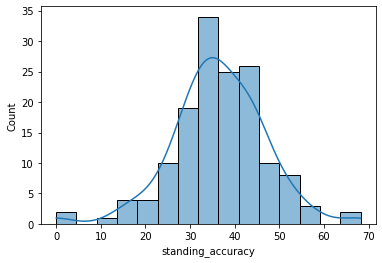

In [304]:
sns.histplot(data=accuracy_frame_fw, x="standing_accuracy", kde=True)

In [358]:
efficient_fw= df_fw[[ 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed', 'unique_fight_id', 'winning_fighter_name','losing_fighter_name', 'fighter_name']].groupby(['unique_fight_id', 'fighter_name']).sum().reset_index()

perc = 0.36
#print(fw_performance.columns)


efficient_fw['significant_strikes_standing_attempted'] = efficient_fw['significant_strikes_standing_attempted'].astype(int)

#-with the average accuracy of the featherweight division we can look at an 
#-expected amount of lands given known number of attempts thrown

efficient_fw['standing_accuracy'] = efficient_fw['significant_strikes_standing_landed'] / efficient_fw['significant_strikes_standing_attempted'] * 100
efficient_fw['expected_strike__standing_lands'] = round(efficient_fw.significant_strikes_standing_attempted * perc)

# this feature is also not finished!!!!
#-With the expected amount of lands we can assume an expected a total amount of volume by multiplying the reciprocal of the average accuracy on featherweight
efficient_fw['expected_strike__standing_attempts'] = (efficient_fw['expected_strike__standing_lands'] * (1 / 0.36)).apply(np.floor)

#-Finally we have standing strikes efficiency which ranks how good a striking performance was based on how much you hit your opponent
efficient_fw['standing_efficiency'] = efficient_fw.significant_strikes_standing_landed / efficient_fw.expected_strike__standing_lands

#-With a known amount of striking lands we can then multiply the known number of landed shots with the inverse of the striking
#-Accuracy percentage. This will return the expected standing strikes thrown of an average featherweight.

#This feature is unfinished!!!!
#efficient_fw['volume_compare'] = efficient_fw['significant_strikes_standing_attempted'] / efficient_fw['expected_strike__standing_attempts']
efficient_fw

,unique_fight_id,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,standing_accuracy,expected_strike__standing_lands,expected_strike__standing_attempts,standing_efficiency
0,69,Dan Ige,68,28,41.176471,24.0,66.0,1.166667
1,69,Mirsad Bektic,54,14,25.925926,19.0,52.0,0.736842
2,78,Chan Sung Jung,18,8,44.444444,6.0,16.0,1.333333
3,78,Frankie Edgar,14,9,64.285714,5.0,13.0,1.800000
4,80,Charles Jourdain,115,52,45.217391,41.0,113.0,1.268293
...,...,...,...,...,...,...,...,...
391,3200,Kron Gracie,10,2,20.000000,4.0,11.0,0.500000
392,3202,Andre Fili,226,98,43.362832,81.0,225.0,1.209877
393,3202,Myles Jury,134,72,53.731343,48.0,133.0,1.500000
394,3212,Gabriel Benitez,72,24,33.333333,26.0,72.0,0.923077


In [306]:
efficient_fw.loc[efficient_fw.fighter_name == 'Max Holloway']

,unique_fight_id,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,standing_accuracy,expected_strike__standing_lands,expected_strike__standing_attempts,standing_efficiency,volume_compare
8,114,Max Holloway,73,30,41.095890,26.0,83.0,1.153846,0.879518
69,690,Max Holloway,301,132,43.853821,108.0,367.0,1.222222,0.820163
222,1910,Max Holloway,181,82,45.303867,65.0,228.0,1.261538,0.793860
243,2074,Max Holloway,29,14,48.275862,10.0,39.0,1.400000,0.743590
287,2508,Max Holloway,319,120,37.617555,115.0,333.0,1.043478,0.957958
305,2648,Max Holloway,159,46,28.930818,57.0,128.0,0.807018,1.242188
341,2888,Max Holloway,149,61,40.939597,54.0,169.0,1.129630,0.881657
385,3173,Max Holloway,479,281,58.663883,172.0,781.0,1.633721,0.613316


In [307]:
fw_expected_by_round = df_fw[[ 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed', 'unique_round_id', 'winning_fighter_name','losing_fighter_name', 'fighter_name']].groupby(['unique_round_id', 'fighter_name']).sum().reset_index()
perc = 0.36
#print(fw_performance.columns)
fw_expected_by_round['significant_strikes_standing_attempted'] = fw_expected_by_round['significant_strikes_standing_attempted'].astype(int)
fw_expected_by_round['expected_strike__standing_lands'] = round(fw_expected_by_round.significant_strikes_standing_attempted * perc)

fw_expected_by_round.head(20)

,unique_round_id,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,expected_strike__standing_lands
0,451,Clay Guida,11,3,4.0
1,452,Thiago Tavares,7,2,3.0
2,453,Brian Ortega,29,5,10.0
3,454,Clay Guida,53,15,19.0
4,455,Brian Ortega,74,24,27.0
5,456,Clay Guida,70,23,25.0
6,457,Brian Ortega,82,31,30.0
7,458,Clay Guida,65,20,23.0
8,465,Yair Rodriguez,61,34,22.0
9,466,Jeremy Stephens,21,9,8.0


In [308]:
fw_expected_by_round['standing_efficiency'] = fw_expected_by_round.significant_strikes_standing_landed / fw_expected_by_round.expected_strike__standing_lands
fw_expected_by_round.head(20)

,unique_round_id,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,expected_strike__standing_lands,standing_efficiency
0,451,Clay Guida,11,3,4.0,0.750000
1,452,Thiago Tavares,7,2,3.0,0.666667
2,453,Brian Ortega,29,5,10.0,0.500000
3,454,Clay Guida,53,15,19.0,0.789474
4,455,Brian Ortega,74,24,27.0,0.888889
5,456,Clay Guida,70,23,25.0,0.920000
6,457,Brian Ortega,82,31,30.0,1.033333
7,458,Clay Guida,65,20,23.0,0.869565
8,465,Yair Rodriguez,61,34,22.0,1.545455
9,466,Jeremy Stephens,21,9,8.0,1.125000


In [309]:
#efficiency
efficient_fw_by_round = fw_expected_by_round[['standing_efficiency', 'expected_strike__standing_lands', 'unique_round_id', 'fighter_name']]

efficient_fw_by_round

,standing_efficiency,expected_strike__standing_lands,unique_round_id,fighter_name
0,0.750000,4.0,451,Clay Guida
1,0.666667,3.0,452,Thiago Tavares
2,0.500000,10.0,453,Brian Ortega
3,0.789474,19.0,454,Clay Guida
4,0.888889,27.0,455,Brian Ortega
...,...,...,...,...
973,1.600000,15.0,7476,Julian Erosa
974,1.333333,3.0,7477,Grant Dawson
975,1.000000,3.0,7478,Julian Erosa
976,1.166667,6.0,7485,Luis Pena


<AxesSubplot:xlabel='standing_efficiency', ylabel='Count'>

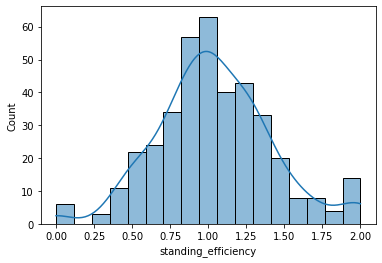

In [310]:
sns.histplot(data=efficient_fw, x="standing_efficiency", kde=True)

In [311]:
efficient_fw.loc[efficient_fw.fighter_name == "Brian Ortega"]

,unique_fight_id,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,standing_accuracy,expected_strike__standing_lands,expected_strike__standing_attempts,standing_efficiency,volume_compare
44,581,Brian Ortega,66,20,30.303030,24.0,56.0,0.833333,1.178571
78,735,Brian Ortega,217,64,29.493088,78.0,178.0,0.820513,1.219101
146,1342,Brian Ortega,66,17,25.757576,24.0,47.0,0.708333,1.404255
224,1913,Brian Ortega,185,60,32.432432,67.0,167.0,0.895522,1.107784
384,3173,Brian Ortega,282,101,35.815603,102.0,281.0,0.990196,1.003559


In [312]:
efficient_fw.loc[efficient_fw.fighter_name == "Max Holloway"]

,unique_fight_id,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,standing_accuracy,expected_strike__standing_lands,expected_strike__standing_attempts,standing_efficiency,volume_compare
8,114,Max Holloway,73,30,41.095890,26.0,83.0,1.153846,0.879518
69,690,Max Holloway,301,132,43.853821,108.0,367.0,1.222222,0.820163
222,1910,Max Holloway,181,82,45.303867,65.0,228.0,1.261538,0.793860
243,2074,Max Holloway,29,14,48.275862,10.0,39.0,1.400000,0.743590
287,2508,Max Holloway,319,120,37.617555,115.0,333.0,1.043478,0.957958
305,2648,Max Holloway,159,46,28.930818,57.0,128.0,0.807018,1.242188
341,2888,Max Holloway,149,61,40.939597,54.0,169.0,1.129630,0.881657
385,3173,Max Holloway,479,281,58.663883,172.0,781.0,1.633721,0.613316


In [313]:
efficient_fw.loc[efficient_fw.fighter_name == "Alexander Volkanovski"]

,unique_fight_id,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,standing_accuracy,expected_strike__standing_lands,expected_strike__standing_attempts,standing_efficiency,volume_compare
62,647,Alexander Volkanovski,118,81,68.644068,42.0,225.0,1.928571,0.524444
68,690,Alexander Volkanovski,302,156,51.655629,109.0,433.0,1.431193,0.697460
334,2855,Alexander Volkanovski,93,46,49.462366,33.0,128.0,1.393939,0.726562


In [314]:
#-Plot the average Standing lands for featherweight
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [315]:
x = efficient_fw['expected_strike__standing_lands'].to_numpy()
y = efficient_fw['significant_strikes_standing_landed'].to_numpy()
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.1, train_size=0.9, random_state=1)


In [316]:
X_train= X_train.reshape(-1, 1)
Y_train= Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [317]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [318]:
Y_test.shape

(40,)

In [319]:
top_performers = efficient_fw.loc[efficient_fw['standing_efficiency'] > 1.13]
top_performers

,unique_fight_id,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,standing_accuracy,expected_strike__standing_lands,expected_strike__standing_attempts,standing_efficiency,volume_compare
0,69,Dan Ige,68,28,41.176471,24.0,78.0,1.166667,0.871795
2,78,Chan Sung Jung,18,8,44.444444,6.0,22.0,1.333333,0.818182
3,78,Frankie Edgar,14,9,64.285714,5.0,25.0,1.800000,0.560000
4,80,Charles Jourdain,115,52,45.217391,41.0,144.0,1.268293,0.798611
5,80,Dooho Choi,80,36,45.000000,29.0,100.0,1.241379,0.800000
...,...,...,...,...,...,...,...,...,...
385,3173,Max Holloway,479,281,58.663883,172.0,781.0,1.633721,0.613316
386,3176,Hakeem Dawodu,208,99,47.596154,75.0,275.0,1.320000,0.756364
392,3202,Andre Fili,226,98,43.362832,81.0,272.0,1.209877,0.830882
393,3202,Myles Jury,134,72,53.731343,48.0,200.0,1.500000,0.670000


Intercept: 
 [-2.67084014]
Coefficients: 
 [[1.13866868]]
Mean squared error: 73.69
Root Mean Squared Error: 8.584386441978133
Coefficient of determination: 0.90


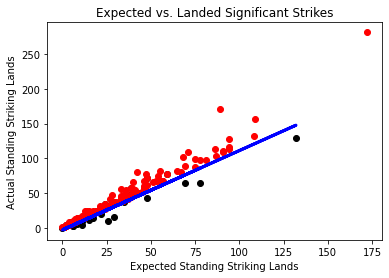

In [320]:
Y_pred = model.predict(X_test)

# Change shape of array
Y_pred.shape = (40,)

# intercept
print("Intercept: \n", model.intercept_)
# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# root mean squared error
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))

# Plot outputs
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, Y_pred, color="blue", linewidth=3)

#plt.plot(x[226], y[226], 'g*')

plt.scatter(top_performers.expected_strike__standing_lands, top_performers.significant_strikes_standing_landed, color='red')


plt.ylabel("Actual Standing Striking Lands")
plt.xlabel("Expected Standing Striking Lands")
plt.xticks()
plt.yticks()

plt.title("Expected vs. Landed Significant Strikes")

plt.show()

In [321]:
df_accur = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

df_accur['Actual'] = df_accur.Actual.abs()
df_accur['Predicted'] = df_accur.Predicted.abs()

df_accur['Accuracy'] = (df_accur.Predicted / df_accur.Actual)
df_accur

,Actual,Predicted,Accuracy
0,3,4.161172,1.387057
1,67,61.094606,0.911860
2,8,5.299841,0.662480
3,12,7.577178,0.631432
4,58,41.737239,0.719608
5,2,1.532171,0.766086
6,77,64.510612,0.837800
7,10,26.934546,2.693455
8,38,30.350552,0.798699
9,3,4.161172,1.387057


In [322]:
expected_by_target_by_fight = df_fw[[ 'significant_strikes_head_landed', 
                                     'significant_strikes_head_attempted', 
                                     'significant_strikes_body_landed', 
                                     'significant_strikes_body_attempted', 
                                     'significant_strikes_leg_landed', 
                                     'significant_strikes_leg_attempted', 
                                     'significant_strikes_ground_landed', 
                                     'significant_strikes_ground_attempted', 
                                     'significant_strikes_clinch_attempted', 
                                     'fight_id','fighter_name']].groupby(['fight_id', 'fighter_name']).sum().reset_index()

expected_by_target_by_fight['head_accuracy'] = expected_by_target_by_fight.significant_strikes_head_landed / expected_by_target_by_fight.significant_strikes_head_attempted
expected_by_target_by_fight['body_accuracy'] = expected_by_target_by_fight.significant_strikes_body_landed / expected_by_target_by_fight.significant_strikes_body_attempted
expected_by_target_by_fight['leg_accuracy'] = expected_by_target_by_fight.significant_strikes_leg_landed / expected_by_target_by_fight.significant_strikes_leg_attempted

fw_head_accuracy = expected_by_target_by_fight['head_accuracy'].mean()
fw_body_accuracy = expected_by_target_by_fight['body_accuracy'].mean()
fw_leg_accuracy = expected_by_target_by_fight['leg_accuracy'].mean()

expected_by_target_by_fight['expected_head_strikes'] = expected_by_target_by_fight.significant_strikes_head_attempted * fw_head_accuracy
expected_by_target_by_fight['expected_body_strikes'] = expected_by_target_by_fight.significant_strikes_body_attempted * fw_body_accuracy
expected_by_target_by_fight['expected_leg_strikes'] = expected_by_target_by_fight.significant_strikes_leg_attempted * fw_leg_accuracy
expected_by_target_by_fight

,fight_id,fighter_name,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,head_accuracy,body_accuracy,leg_accuracy,expected_head_strikes,expected_body_strikes,expected_leg_strikes
0,69,Dan Ige,27,70,15,17,1,1,3,4,16,0.385714,0.882353,1.000000,24.685891,11.267429,0.807364
1,69,Mirsad Bektic,14,56,3,4,0,0,0,0,6,0.250000,0.750000,NaN,19.748712,2.651160,0.000000
2,78,Chan Sung Jung,46,60,0,0,0,0,38,42,0,0.766667,NaN,NaN,21.159335,0.000000,0.000000
3,78,Frankie Edgar,6,11,1,1,2,2,0,0,0,0.545455,1.000000,1.000000,3.879211,0.662790,1.614727
4,80,Charles Jourdain,38,84,23,37,3,8,8,10,4,0.452381,0.621622,0.375000,29.623069,24.523227,6.458908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,3200,Kron Gracie,1,6,0,0,1,4,0,0,0,0.166667,NaN,0.250000,2.115933,0.000000,3.229454
392,3202,Andre Fili,65,179,9,16,24,31,0,0,0,0.363128,0.562500,0.774194,63.125349,10.604639,25.028269
393,3202,Myles Jury,47,110,10,11,19,22,4,9,0,0.427273,0.909091,0.863636,38.792114,7.290689,17.761997
394,3212,Gabriel Benitez,11,55,4,8,9,9,0,0,0,0.200000,0.500000,1.000000,19.396057,5.302319,7.266272


Regression using Seaborn Regression Plot

Text(0.5, 1.0, 'Expected strike lands vs. Actual standing lands')

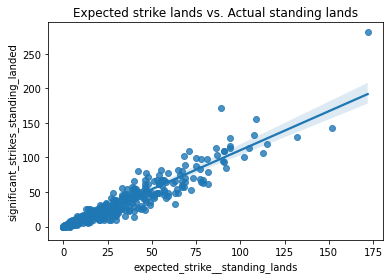

In [324]:
sns.regplot(data=efficient_fw, y='significant_strikes_standing_landed', x='expected_strike__standing_lands')
plt.title('Expected strike lands vs. Actual standing lands')

Text(0.5, 1.0, 'Expected head strike lands vs. Actual head strike lands')

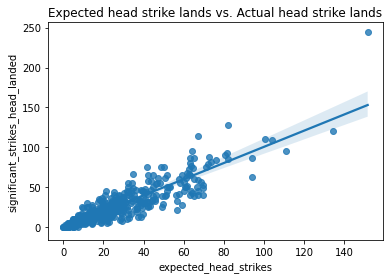

In [325]:
sns.regplot(data=expected_by_target_by_fight, y='significant_strikes_head_landed', x='expected_head_strikes')
plt.title('Expected head strike lands vs. Actual head strike lands')

Text(0.5, 1.0, 'Expected body strike lands vs. Actual body strike lands')

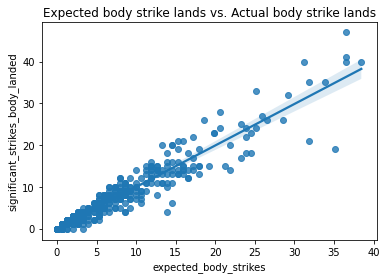

In [326]:
sns.regplot(data=expected_by_target_by_fight, y='significant_strikes_body_landed', x='expected_body_strikes')
plt.title('Expected body strike lands vs. Actual body strike lands')

Text(0.5, 1.0, 'Expected leg strike lands vs. Actual leg strike lands')

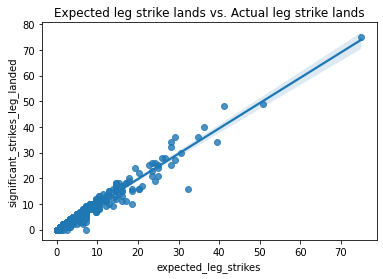

In [327]:
sns.regplot(data=expected_by_target_by_fight, y='significant_strikes_leg_landed', x='expected_leg_strikes')
plt.title('Expected leg strike lands vs. Actual leg strike lands')

In [328]:
expected_by_target_by_fight = expected_by_target_by_fight.dropna()
x_expected = expected_by_target_by_fight['expected_head_strikes'].to_numpy()
y_landed = expected_by_target_by_fight['significant_strikes_head_landed'].to_numpy()
X_train_head,X_test_head,y_train_head,y_test_head = train_test_split(x_expected, y_landed, test_size=0.10, train_size=0.90, random_state=3)


In [329]:
X_train_head= X_train_head.reshape(-1, 1)
y_train_head= y_train_head.reshape(-1, 1)
X_test_head = X_test_head.reshape(-1, 1)

In [330]:
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [331]:
expected_by_target_by_fight

,fight_id,fighter_name,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,head_accuracy,body_accuracy,leg_accuracy,expected_head_strikes,expected_body_strikes,expected_leg_strikes
0,69,Dan Ige,27,70,15,17,1,1,3,4,16,0.385714,0.882353,1.000000,24.685891,11.267429,0.807364
3,78,Frankie Edgar,6,11,1,1,2,2,0,0,0,0.545455,1.000000,1.000000,3.879211,0.662790,1.614727
4,80,Charles Jourdain,38,84,23,37,3,8,8,10,4,0.452381,0.621622,0.375000,29.623069,24.523227,6.458908
5,80,Dooho Choi,30,80,9,11,3,3,3,6,8,0.375000,0.818182,1.000000,28.212446,7.290689,2.422091
6,111,Sean Soriano,14,21,3,3,2,2,6,6,6,0.666667,1.000000,1.000000,7.405767,1.988370,1.614727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,3190,Russell Doane,3,9,0,1,3,5,1,3,1,0.333333,0.000000,0.600000,3.173900,0.662790,4.036818
392,3202,Andre Fili,65,179,9,16,24,31,0,0,0,0.363128,0.562500,0.774194,63.125349,10.604639,25.028269
393,3202,Myles Jury,47,110,10,11,19,22,4,9,0,0.427273,0.909091,0.863636,38.792114,7.290689,17.761997
394,3212,Gabriel Benitez,11,55,4,8,9,9,0,0,0,0.200000,0.500000,1.000000,19.396057,5.302319,7.266272


In [332]:
expected_by_target_by_fight['head_efficiency'] = expected_by_target_by_fight.significant_strikes_head_landed / expected_by_target_by_fight.expected_head_strikes
expected_by_target_by_fight['body_efficiency'] = expected_by_target_by_fight.significant_strikes_body_landed / expected_by_target_by_fight.expected_body_strikes
expected_by_target_by_fight['leg_efficiency'] = expected_by_target_by_fight.significant_strikes_leg_landed / expected_by_target_by_fight.expected_leg_strikes




<ipython-input-332-3d10acac3ec5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_by_target_by_fight['head_efficiency'] = expected_by_target_by_fight.significant_strikes_head_landed / expected_by_target_by_fight.expected_head_strikes
<ipython-input-332-3d10acac3ec5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_by_target_by_fight['body_efficiency'] = expected_by_target_by_fight.significant_strikes_body_landed / expected_by_target_by_fight.expected_body_strikes
<ipython-input-332-3d10aca

In [333]:
top_target_performers_head = expected_by_target_by_fight.loc[expected_by_target_by_fight.head_efficiency > 1.13]
top_target_performers_head

,fight_id,fighter_name,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,head_accuracy,body_accuracy,leg_accuracy,expected_head_strikes,expected_body_strikes,expected_leg_strikes,head_efficiency,body_efficiency,leg_efficiency
3,78,Frankie Edgar,6,11,1,1,2,2,0,0,0,0.545455,1.000000,1.000000,3.879211,0.662790,1.614727,1.546706,1.508774,1.238599
4,80,Charles Jourdain,38,84,23,37,3,8,8,10,4,0.452381,0.621622,0.375000,29.623069,24.523227,6.458908,1.282784,0.937886,0.464475
6,111,Sean Soriano,14,21,3,3,2,2,6,6,6,0.666667,1.000000,1.000000,7.405767,1.988370,1.614727,1.890419,1.508774,1.238599
8,114,Max Holloway,58,119,14,18,2,2,3,5,61,0.487395,0.777778,1.000000,41.966014,11.930219,1.614727,1.382071,1.173491,1.238599
11,209,Frankie Edgar,76,142,6,10,8,10,58,80,1,0.535211,0.600000,0.800000,50.077092,6.627899,8.073635,1.517660,0.905264,0.990880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,3080,Dennis Bermudez,33,69,5,7,7,9,32,55,8,0.478261,0.714286,0.777778,24.333235,4.639529,7.266272,1.356170,1.077695,0.963355
381,3167,Jimy Hettes,16,40,13,17,5,7,1,1,36,0.400000,0.764706,0.714286,14.106223,11.267429,5.651545,1.134251,1.153768,0.884714
383,3172,Rob Whiteford,14,34,9,12,3,4,3,5,11,0.411765,0.750000,0.750000,11.990290,7.953479,3.229454,1.167611,1.131580,0.928950
385,3173,Max Holloway,244,430,41,55,5,5,1,1,10,0.567442,0.745455,1.000000,151.641900,36.453446,4.036818,1.609054,1.124722,1.238599


Intercept: 
 [-2.67084014]
Coefficients: 
 [[1.13866868]]
Mean squared error: 106.85
Root Mean Squared Error: 10.336611631797908
Coefficient of determination: 0.86


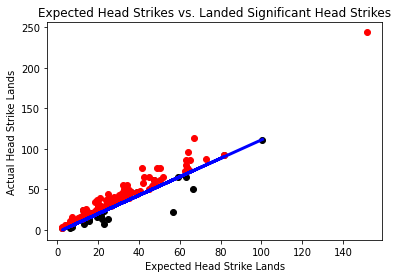

In [334]:
Y_pred_head = regr.predict(X_test_head)

# Change shape of array
#Y_pred_head.shape = (196,)

# intercept
print("Intercept: \n", regr.intercept_)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_head, Y_pred_head))
# root mean squared error
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_head, Y_pred_head)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_head, Y_pred_head))

# Plot outputs
plt.scatter(X_test_head, y_test_head, color="black")
plt.plot(X_test_head, Y_pred_head, color="blue", linewidth=3)

plt.scatter(top_target_performers_head.expected_head_strikes, top_target_performers_head.significant_strikes_head_landed, color="red")

plt.ylabel("Actual Head Strike Lands")
plt.xlabel("Expected Head Strike Lands")
plt.xticks()
plt.yticks()

plt.title("Expected Head Strikes vs. Landed Significant Head Strikes")

plt.show()

In [335]:
x_body = expected_by_target_by_fight['expected_body_strikes'].to_numpy()
y_body = expected_by_target_by_fight['significant_strikes_body_landed'].to_numpy()
X_train_body,X_test_body,y_train_body,y_test_body = train_test_split(x_body, y_body, test_size=0.10, train_size=0.90, random_state=1)


In [336]:
X_train_body= X_train_body.reshape(-1, 1)
y_train_body= y_train_body.reshape(-1, 1)
X_test_body = X_test_body.reshape(-1, 1)

In [337]:
regr_body = LinearRegression()
regr_body.fit(X_train_body, y_train_body)

LinearRegression()

Intercept: 
 [0.02200664]
Coefficients: 
 [[0.98965877]]
Mean squared error: 3.47
Root Mean Squared Error: 1.862967411053302
Coefficient of determination: 0.95


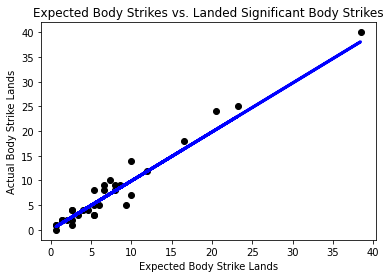

In [338]:
Y_pred_body = regr_body.predict(X_test_body)

# Change shape of array
#Y_pred_head.shape = (196,)

# intercept
print("Intercept: \n", regr_body.intercept_)
# The coefficients
print("Coefficients: \n", regr_body.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_body, Y_pred_body))
# root mean squared error
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_body, Y_pred_body)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_body, Y_pred_body))

# Plot outputs
plt.scatter(X_test_body, y_test_body, color="black")
plt.plot(X_test_body, Y_pred_body, color="blue", linewidth=3)

plt.ylabel("Actual Body Strike Lands")
plt.xlabel("Expected Body Strike Lands")
plt.xticks()
plt.yticks()

plt.title("Expected Body Strikes vs. Landed Significant Body Strikes")

plt.show()

<AxesSubplot:xlabel='head_efficiency'>

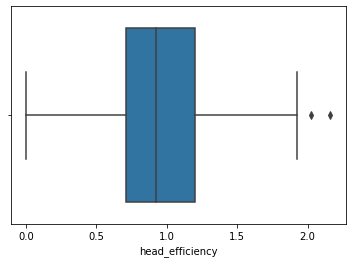

In [339]:
sns.boxplot(data=expected_by_target_by_fight, x="head_efficiency")

<AxesSubplot:xlabel='body_efficiency'>

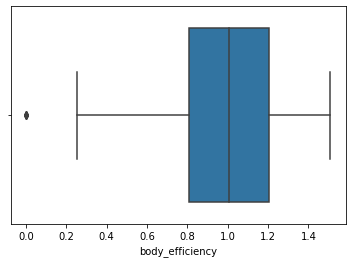

In [340]:
sns.boxplot(data=expected_by_target_by_fight, x="body_efficiency")

<AxesSubplot:xlabel='leg_efficiency'>

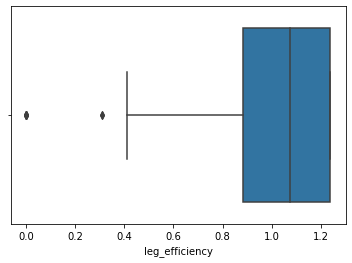

In [341]:
sns.boxplot(data=expected_by_target_by_fight, x="leg_efficiency")